# Fashion MNIST - CNN 
- 2 Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network(512) layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [1]:
import numpy as np 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


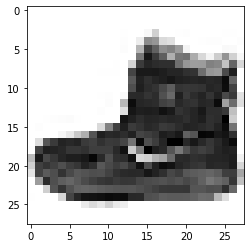

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

In [5]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# 3차원 데이터를 4차원으로 (데이터는 2차원을 3차원으로)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### 모델 정의, 설정, 학습, 평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),                              # n차원을 1차원으로 변환
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [10]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [11]:
# 모델 최적화를 위한 설정
modelpath = 'model/best_fashion_mnist_cnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=5)

In [12]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.31664, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00002: val_loss improved from 0.31664 to 0.26714, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00003: val_loss improved from 0.26714 to 0.24470, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00004: val_loss improved from 0.24470 to 0.23348, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00005: val_loss improved from 0.23348 to 0.22406, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00006: val_loss improved from 0.22406 to 0.21281, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00007: val_loss improved from 0.21281 to 0.19862, saving model to model\best_fashion_mnist_cnn.h5

Epoch 00008: val_loss did not improve from 0.19862

Epoch 00009: val_loss did not improve from 0.19862

Epoch 00010: val_loss did not improve from 0.19862

Epoch 00011: val_loss did not improve from 0.19862

Epoch 00012: val_loss did not improve from 0.19862


In [14]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2146 - accuracy: 0.9211


[0.21462363004684448, 0.9211000204086304]

### 훈련과정 시각화

In [15]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

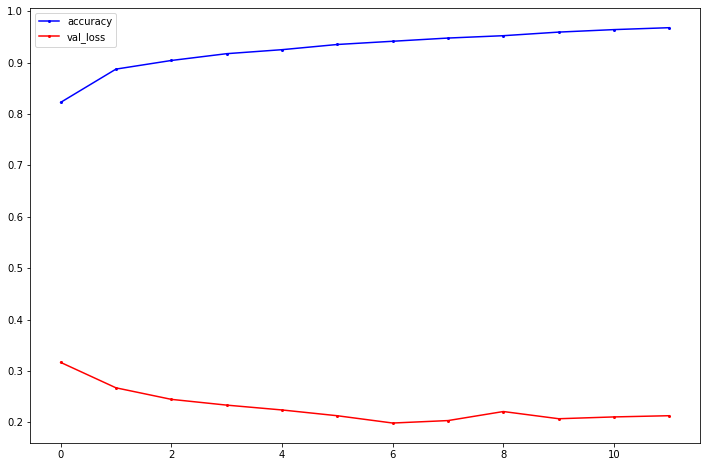

In [16]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()